In [1]:
import pandas as pd
import seaborn as sns; sns.set_style("darkgrid")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import janitor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_categorical_dtype

### Mini data cleaning

In [2]:
train = pd.read_csv("../data/train.csv").clean_names()
#df

In [3]:
#train, test = train_test_split(df, train_size=0.8, random_state=42, stratify=df["leaveornot"])

In [4]:
#train.to_csv("../data/train.csv", index=False)
#test.to_csv("../data/test.csv", index=False)

In [5]:
train.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,2513_01,Earth,False,NaN,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,Loree Mathison,False
1,2774_02,Earth,False,F/575/P,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,Crisey Mcbriddley,False
2,8862_04,Europa,True,C/329/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Alramix Myling,True
3,8736_02,Mars,False,F/1800/P,TRAPPIST-1e,20.0,False,NaN,2.0,289.0,976.0,0.0,Tros Pota,True
4,0539_02,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet,True


In [6]:
train.shape

(6954, 14)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954 entries, 0 to 6953
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   6954 non-null   object 
 1   homeplanet    6786 non-null   object 
 2   cryosleep     6777 non-null   object 
 3   cabin         6796 non-null   object 
 4   destination   6815 non-null   object 
 5   age           6806 non-null   float64
 6   vip           6792 non-null   object 
 7   roomservice   6828 non-null   float64
 8   foodcourt     6814 non-null   float64
 9   shoppingmall  6789 non-null   float64
 10  spa           6820 non-null   float64
 11  vrdeck        6803 non-null   float64
 12  name          6795 non-null   object 
 13  transported   6954 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 713.2+ KB


In [8]:
train["homeplanet"].unique()

array(['Earth', 'Europa', 'Mars', nan], dtype=object)

In [9]:
train["cryosleep"].unique()

array([False, True, nan], dtype=object)

In [10]:
train["cabin"].unique()

array([nan, 'F/575/P', 'C/329/S', ..., 'G/988/S', 'F/1063/S', 'C/253/P'],
      dtype=object)

In [11]:
train["destination"].unique()

array(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', nan], dtype=object)

In [12]:
train["vip"].unique()

array([False, True, nan], dtype=object)

In [13]:
train["vrdeck"].unique()

array([0.000e+00,       nan, 2.000e+00, ..., 5.430e+02, 2.311e+03,
       6.027e+03])

In [14]:
train["cabin"].str.split("/")[2][2]

'S'

In [15]:
train = train.dropna(subset=["homeplanet", "cryosleep", "cabin", "destination", "vip", "age"])

In [16]:
train.shape

(6047, 14)

In [17]:
### converting specific columns
train["homeplanet"] = train["homeplanet"].astype("category")
train["cryosleep"] = train["cryosleep"].astype("category")
train["cabin"] = train["cabin"].astype("category")
train["destination"] = train["destination"].astype("category")
train["vip"] = train["vip"].astype("category")

In [18]:
train.columns

Index(['passengerid', 'homeplanet', 'cryosleep', 'cabin', 'destination', 'age',
       'vip', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck',
       'name', 'transported'],
      dtype='object')

In [19]:
train[['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']] = train[['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']].fillna(0.0)

In [20]:
train = train.reset_index(drop=True)
train.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,2774_02,Earth,False,F/575/P,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,Crisey Mcbriddley,False
1,8862_04,Europa,True,C/329/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Alramix Myling,True
2,8736_02,Mars,False,F/1800/P,TRAPPIST-1e,20.0,False,0.0,2.0,289.0,976.0,0.0,Tros Pota,True
3,0539_02,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet,True
4,7696_02,Mars,False,F/1601/P,TRAPPIST-1e,37.0,False,1000.0,0.0,80.0,40.0,0.0,Ars Ches,False


In [21]:
for i in range(len(train)):
    train.loc[i, "side"] = train.loc[i, "cabin"].split("/")[2]
train

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,side
0,2774_02,Earth,False,F/575/P,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,Crisey Mcbriddley,False,P
1,8862_04,Europa,True,C/329/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Alramix Myling,True,S
2,8736_02,Mars,False,F/1800/P,TRAPPIST-1e,20.0,False,0.0,2.0,289.0,976.0,0.0,Tros Pota,True,P
3,0539_02,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet,True,P
4,7696_02,Mars,False,F/1601/P,TRAPPIST-1e,37.0,False,1000.0,0.0,80.0,40.0,0.0,Ars Ches,False,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042,0504_01,Europa,True,B/19/S,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,Thabius Unpasine,True,S
6043,6633_01,Europa,False,B/255/S,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Nunkib Motive,True,S
6044,5756_06,Earth,False,F/1194/P,PSO J318.5-22,22.0,False,158.0,0.0,476.0,0.0,26.0,Karena Briggston,False,P
6045,0925_01,Mars,False,F/191/P,TRAPPIST-1e,34.0,False,379.0,0.0,1626.0,0.0,0.0,Skix Kraie,False,P


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6047 entries, 0 to 6046
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   passengerid   6047 non-null   object  
 1   homeplanet    6047 non-null   category
 2   cryosleep     6047 non-null   category
 3   cabin         6047 non-null   category
 4   destination   6047 non-null   category
 5   age           6047 non-null   float64 
 6   vip           6047 non-null   category
 7   roomservice   6047 non-null   float64 
 8   foodcourt     6047 non-null   float64 
 9   shoppingmall  6047 non-null   float64 
 10  spa           6047 non-null   float64 
 11  vrdeck        6047 non-null   float64 
 12  name          5908 non-null   object  
 13  transported   6047 non-null   bool    
 14  side          6047 non-null   object  
dtypes: bool(1), category(5), float64(6), object(3)
memory usage: 634.7+ KB


In [23]:
train["transported"] = train["transported"].replace([False, True], [0,1])

In [24]:
train.to_csv("../data/train_new.csv", index=False)

In [25]:
test = pd.read_csv("../data/test.csv")
#test = test.merge(region, how = "left", left_on = "state", right_on = "State Code").clean_names()
#test.info()

In [26]:
test = test.dropna(subset=["homeplanet", "cryosleep", "cabin", "destination", "vip", "age"])

### converting specific columns
test["homeplanet"] = test["homeplanet"].astype("category")
test["cryosleep"] = test["cryosleep"].astype("category")
test["cabin"] = test["cabin"].astype("category")
test["destination"] = test["destination"].astype("category")
test["vip"] = test["vip"].astype("category")

test[['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']] = test[['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']].fillna(0.0)
test = test.reset_index(drop=True)

for i in range(len(test)):
    test.loc[i, "side"] = test.loc[i, "cabin"].split("/")[2]

test["transported"] = test["transported"].replace([False, True], [0,1])

In [27]:
test.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,side
0,0337_02,Mars,False,F/63/S,TRAPPIST-1e,19.0,False,417.0,349.0,634.0,3.0,1057.0,Weros Perle,1,S
1,2891_01,Earth,False,G/460/S,TRAPPIST-1e,18.0,False,4.0,904.0,0.0,0.0,1.0,Gleney Ortinericey,0,S
2,8998_01,Earth,True,G/1449/S,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,Gerry Englence,0,S
3,1771_01,Earth,False,G/291/P,TRAPPIST-1e,35.0,False,0.0,338.0,436.0,0.0,0.0,Antone Cardner,1,P
4,9034_02,Europa,True,D/288/P,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Errairk Crakete,1,P


In [28]:
test.to_csv("../data/test_new.csv")

In [29]:
test.shape

(1525, 15)

### Univariate analysis

In [30]:
def cat_eda(var):
    plt.figure(figsize=(15,10))
    sns.countplot(x = var, data = train, hue  = "transported")
    plt.show();

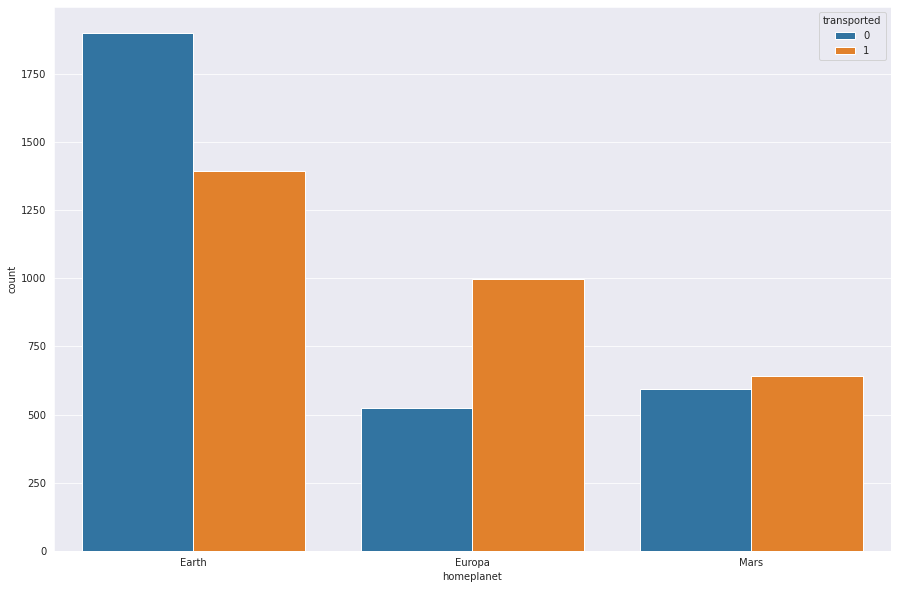

In [31]:
cat_eda("homeplanet")

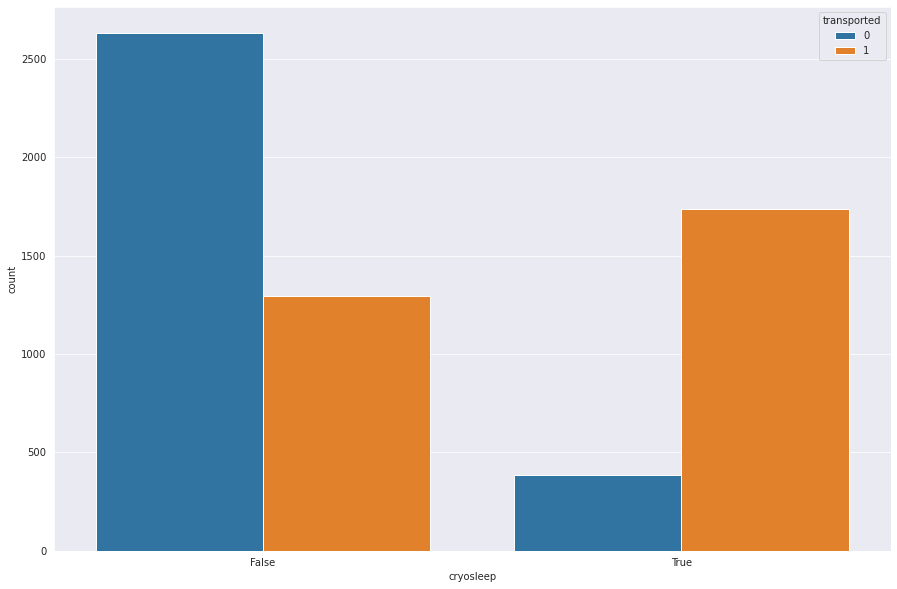

In [32]:
cat_eda("cryosleep")

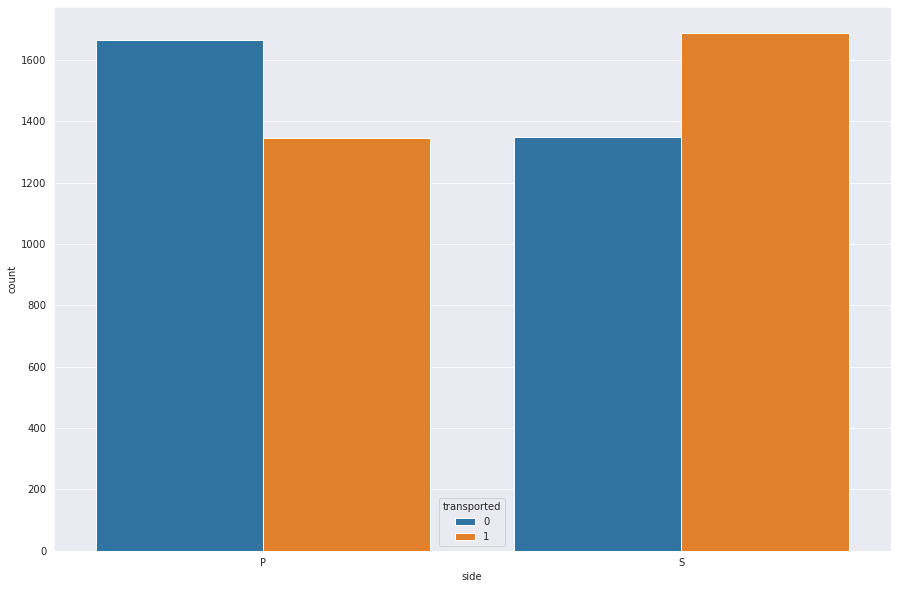

In [33]:
cat_eda("side")

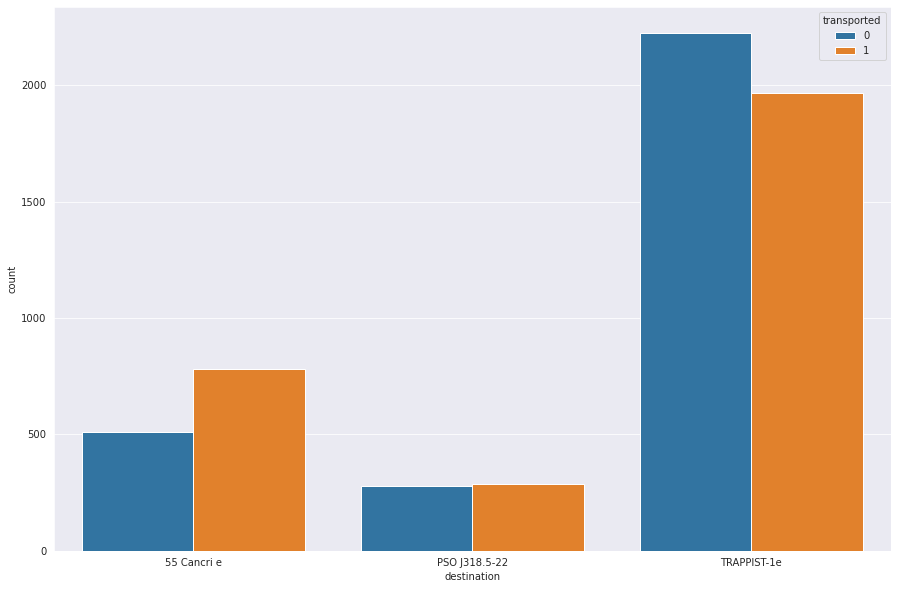

In [34]:
cat_eda("destination")

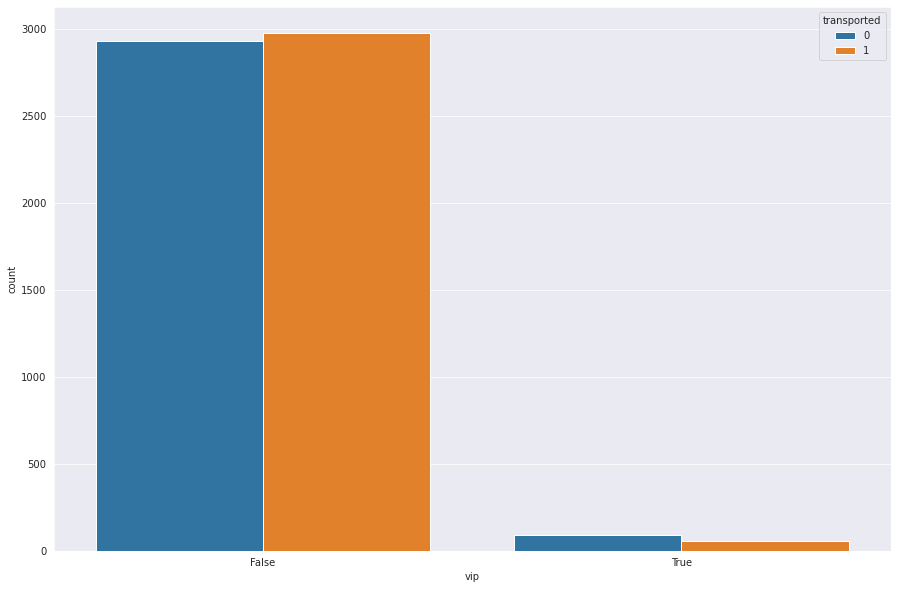

In [35]:
cat_eda("vip")

In [36]:
def num_eda(var):
    plt.figure(figsize=(15,10))
    sns.kdeplot(x = var, data = train, hue  = "transported")
    #plt.ylim(0, 500)
    plt.show(); 

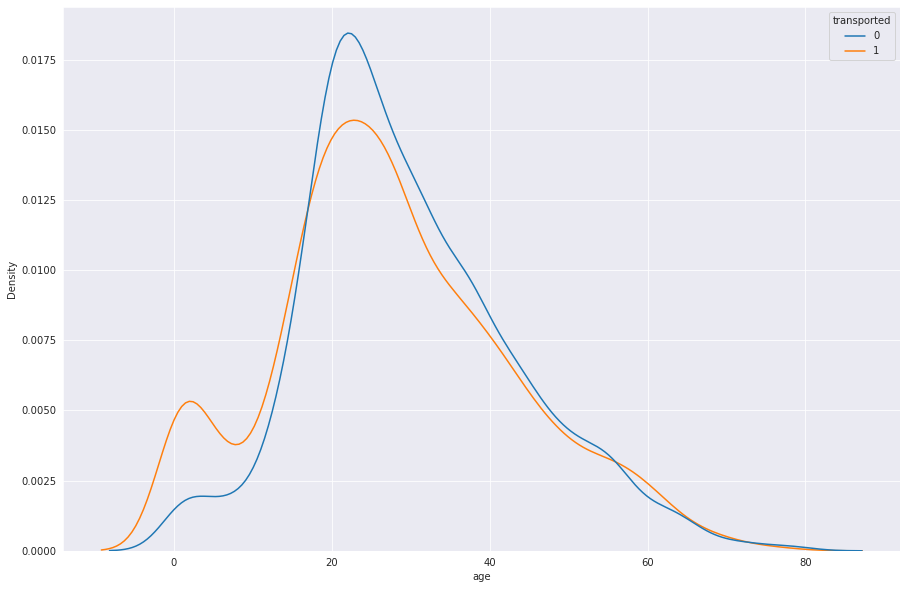

In [37]:
num_eda("age")

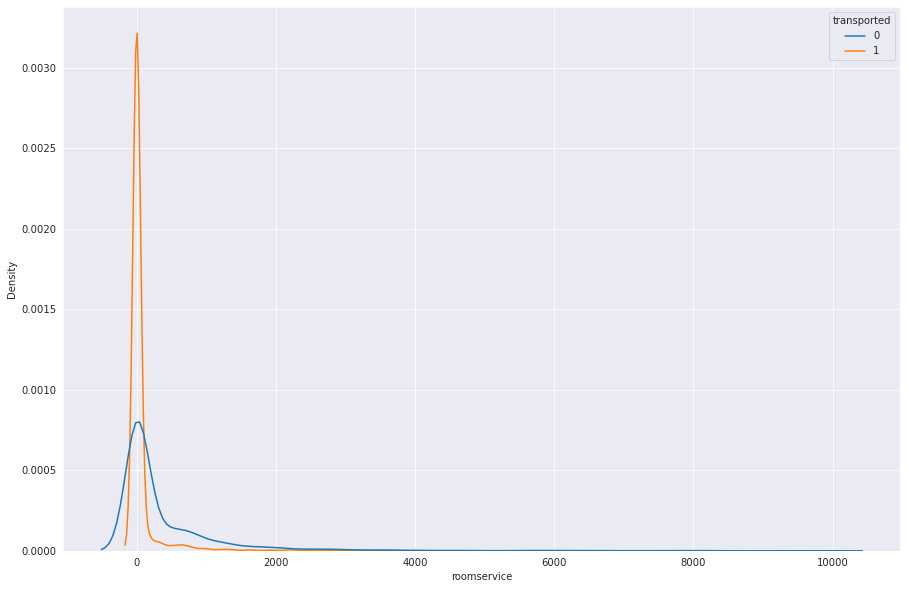

In [38]:
num_eda("roomservice")

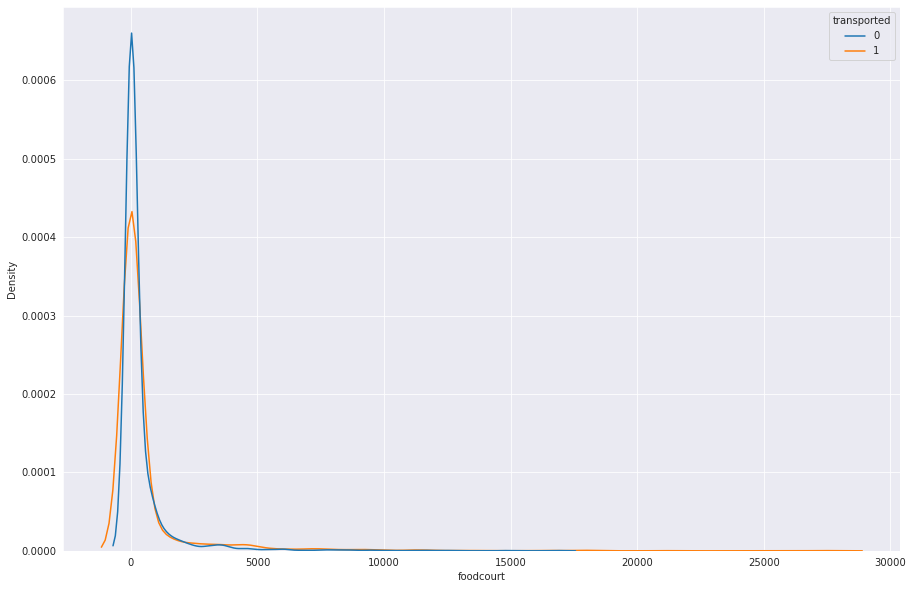

In [39]:
num_eda("foodcourt")

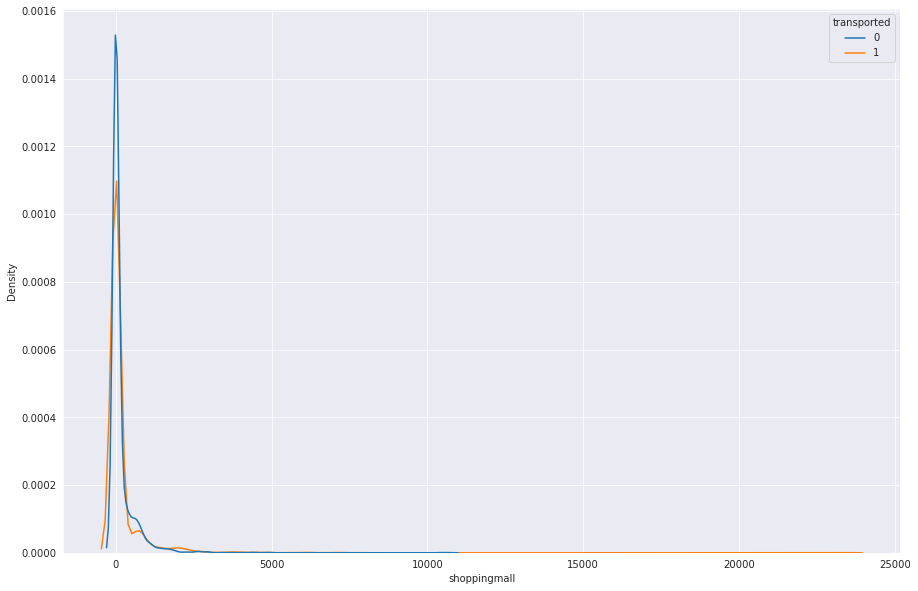

In [40]:
num_eda("shoppingmall")

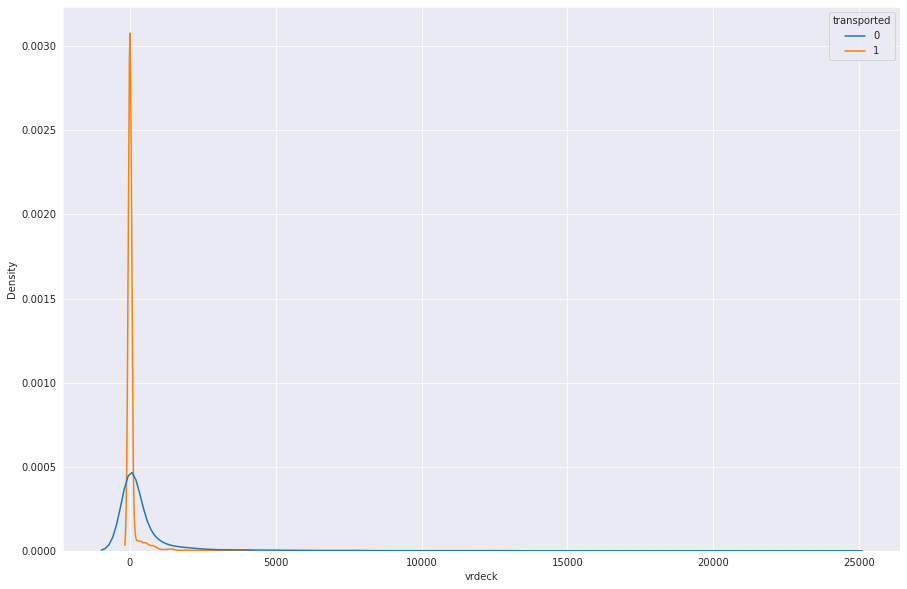

In [41]:
num_eda("vrdeck")

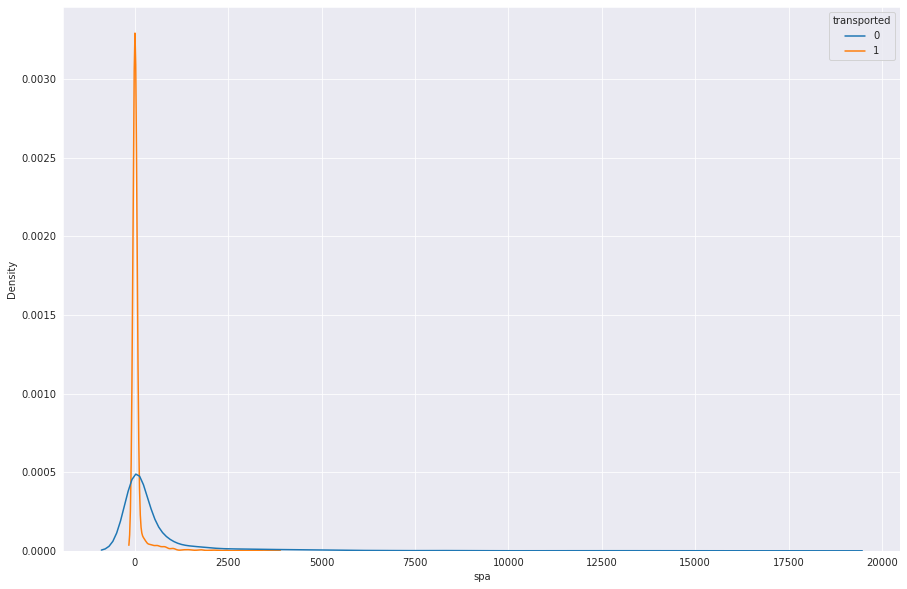

In [42]:
num_eda("spa")

### Multivariate Analysis

<Figure size 2880x1440 with 0 Axes>

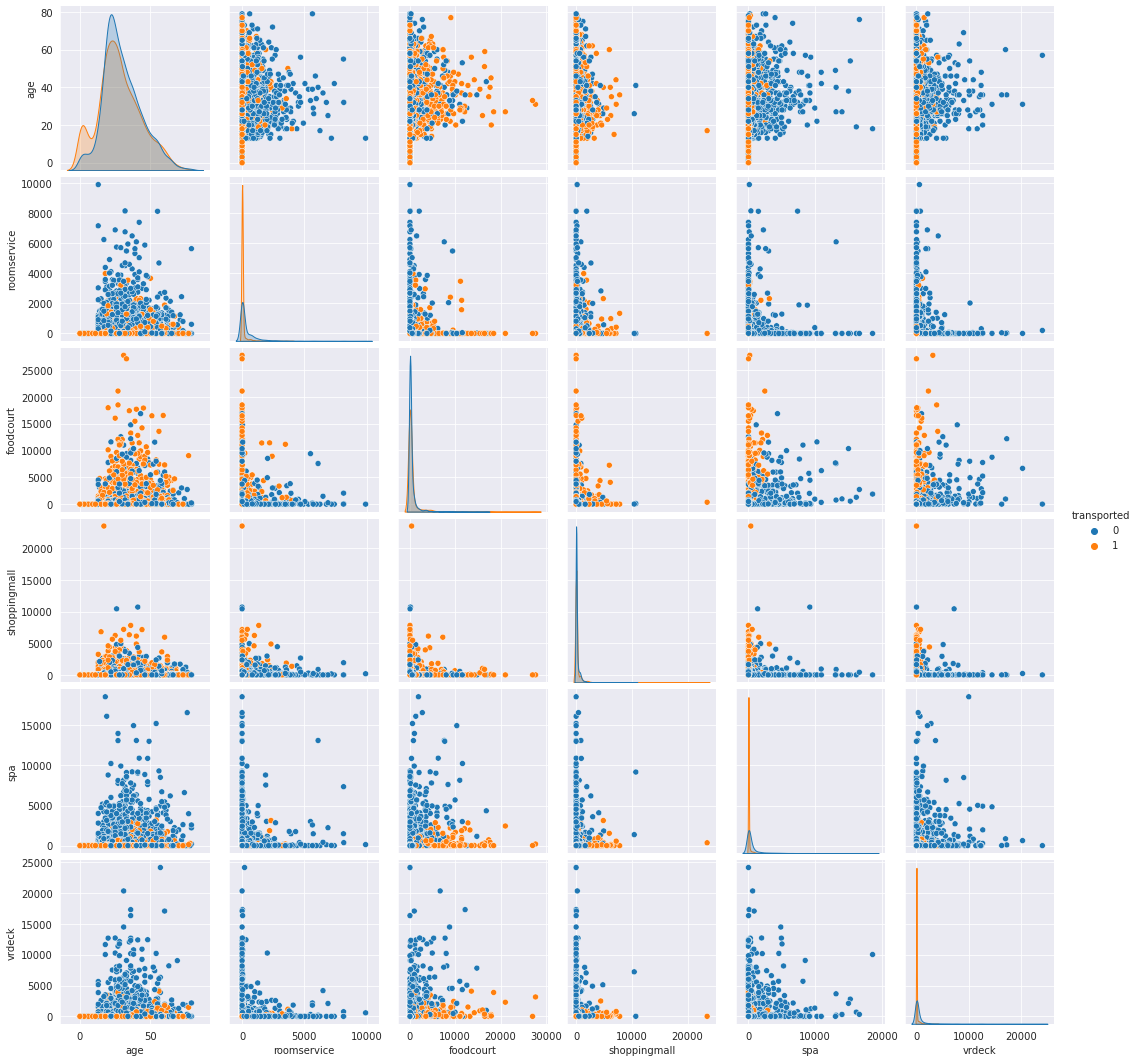

In [43]:
plt.figure(figsize=(40,20))
sns.pairplot(train, hue="transported")
plt.show();

In [44]:
cat_col = []
num_col = []
for col in list(train.columns):
    if is_categorical_dtype(train[col]):
        cat_col.append(col)
    elif is_numeric_dtype(train[col]):
        num_col.append(col)

In [45]:
num_col, cat_col

(['age',
  'roomservice',
  'foodcourt',
  'shoppingmall',
  'spa',
  'vrdeck',
  'transported'],
 ['homeplanet', 'cryosleep', 'cabin', 'destination', 'vip'])

In [47]:
num_col.remove("transported")

In [48]:
cat_col.remove("cabin")

In [49]:
num_col, cat_col

(['age', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck'],
 ['homeplanet', 'cryosleep', 'destination', 'vip'])

In [52]:
def multiple_cat_num_eda(num, cat):
    fig, axes = plt.subplots(nrows=len(num), ncols=len(cat), figsize = (30, 60))
    for i in range(len(num)):
        for j in range(len(cat)):
          #if var_list[i] != var_list[j]:
            sns.violinplot(x = cat[j], y = num[i], data = train, hue = "transported", ax = axes[i,j])
            ax = axes[i,j]
            ax.set_ylabel(num[i], fontsize=14)
            ax.set_xlabel(cat[j], fontsize=14)

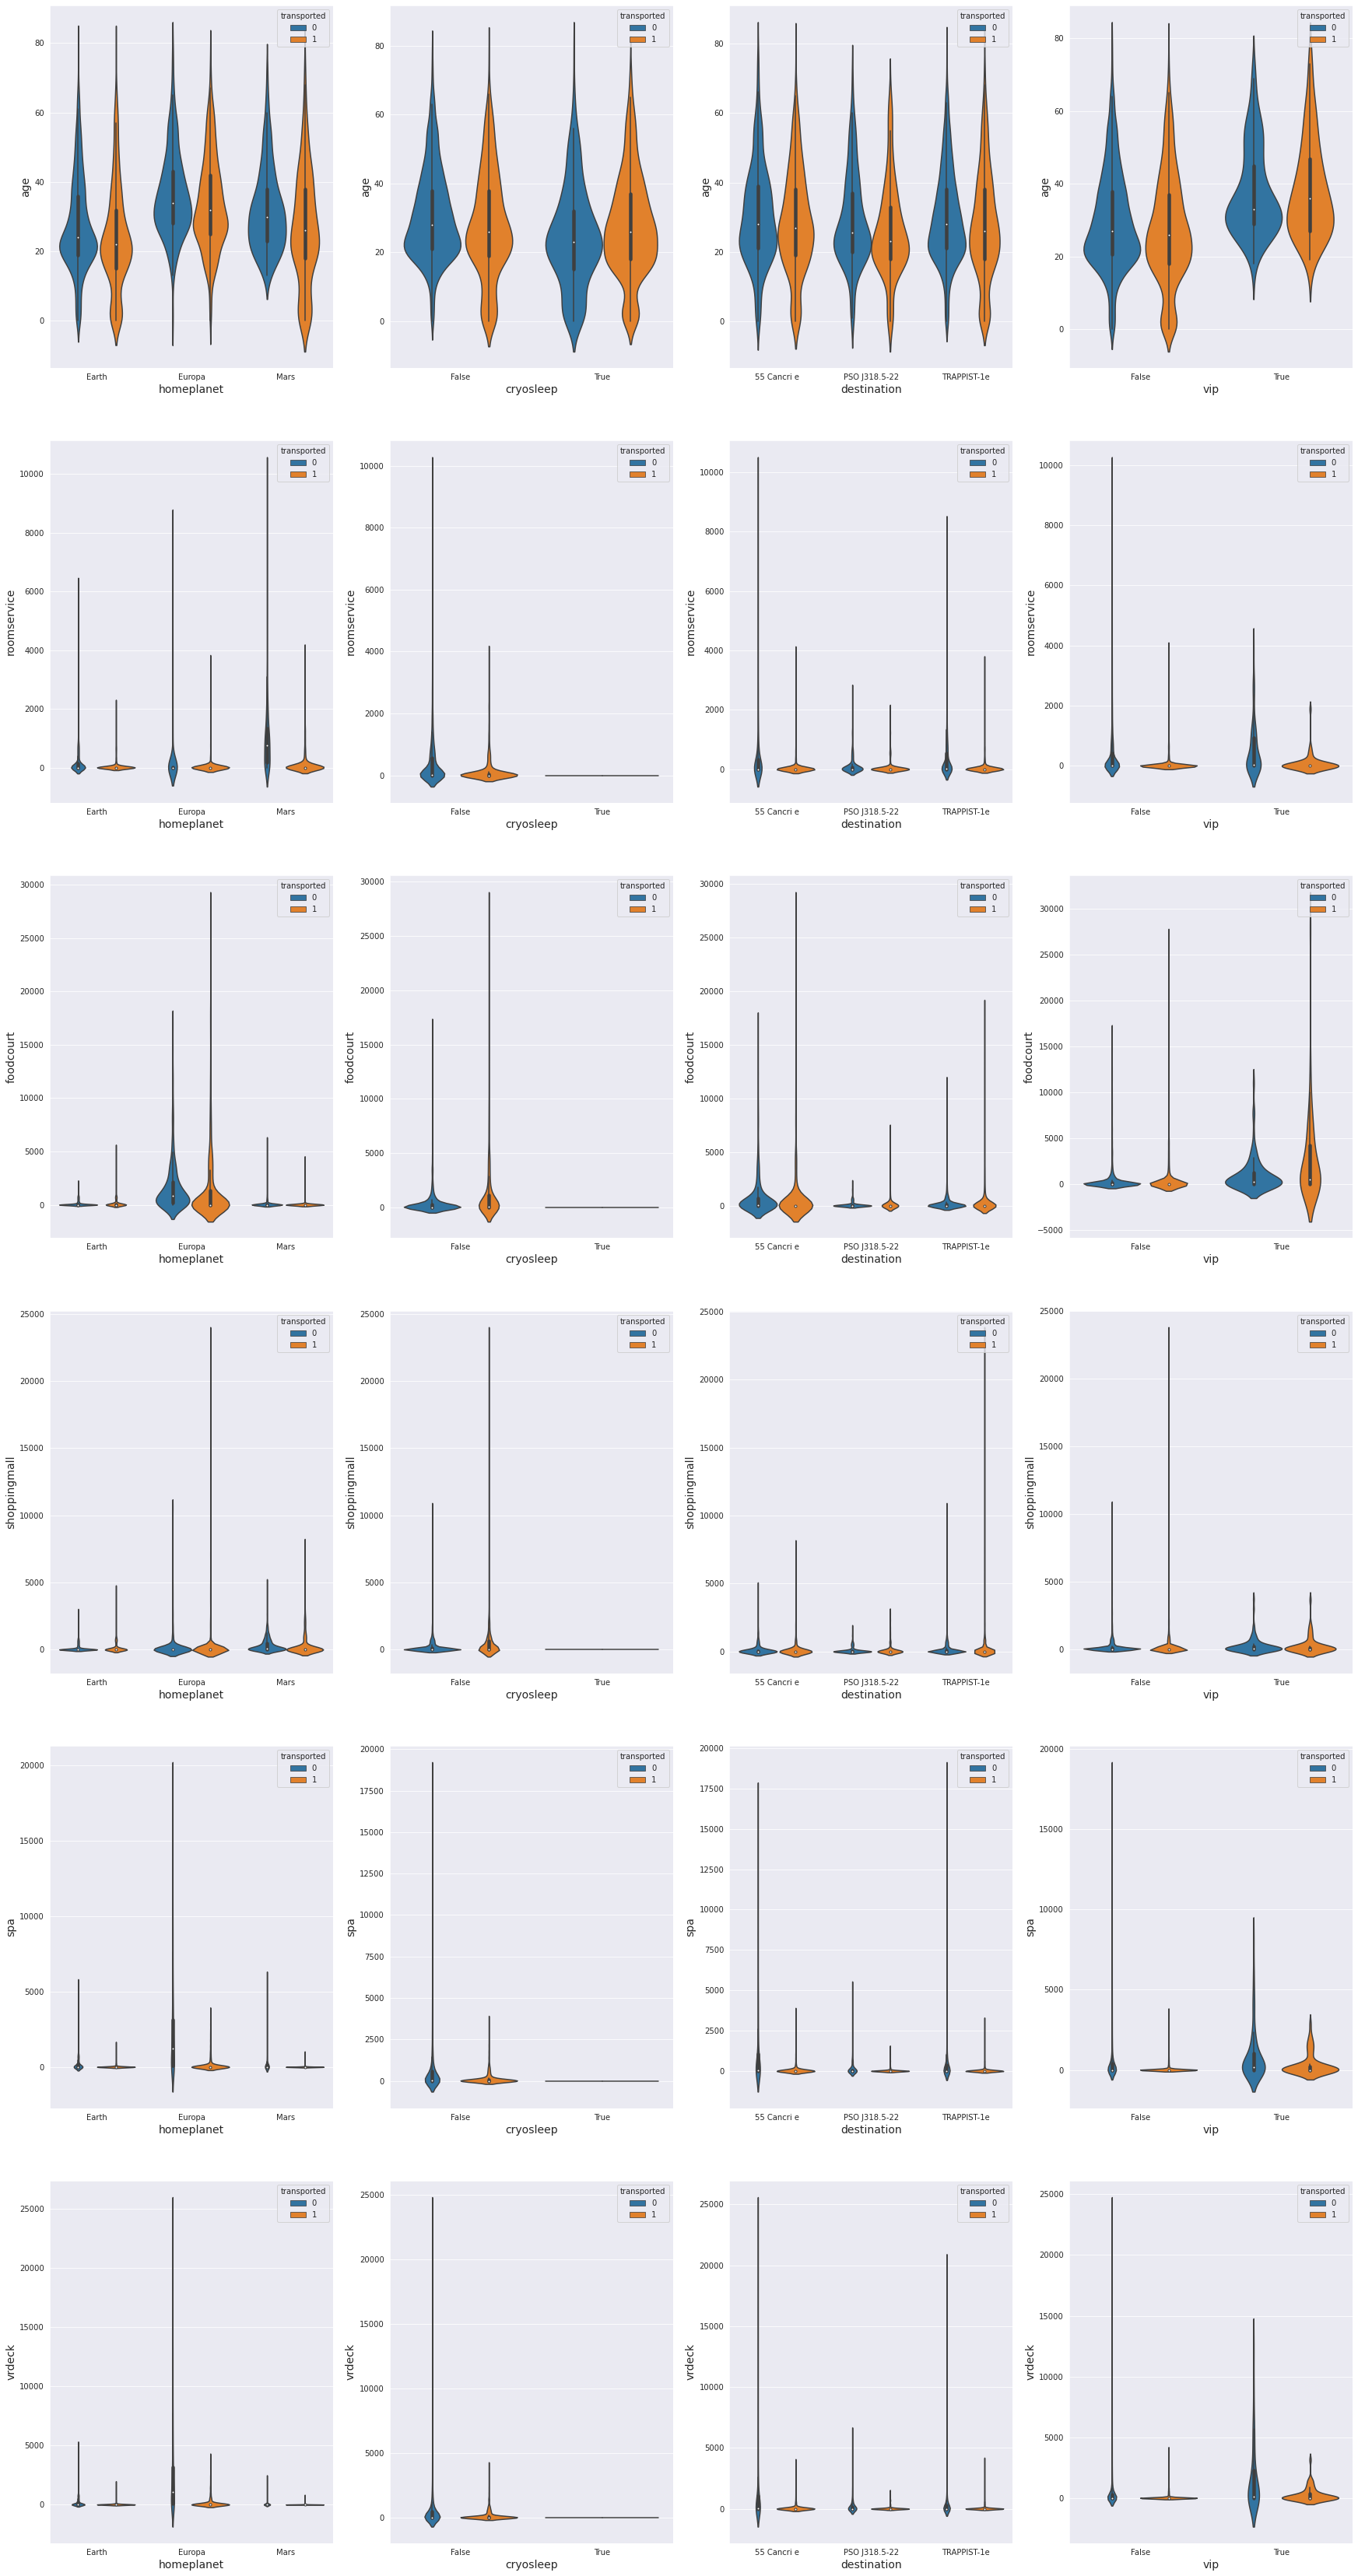

In [53]:
multiple_cat_num_eda(num_col, cat_col)

In [56]:
def cat_cat_transported(var1, var2):
    train_use = train[[var1, var2, "transported"]]
    train_use = train_use.groupby([var1, var2, "transported"], as_index = False).size()
    train_use = train_use.pivot_table(index = [var1, var2], columns = "transported", values = "size")
    train_use = train_use.rename(columns = {0: "No", 1: "Yes"})
    train_use["prop_transported"] = train_use["Yes"] / (train_use["No"] + train_use["Yes"])
    train_use = train_use.fillna(0)
    train_use["group"] = train_use.index
    train_use = train_use.reset_index(drop = True)
    train_use = train_use.rename_axis(None, axis=1)
      #train_use["group"]
    train_use[var1] = train_use["group"].str.get(0)
    train_use[var2] = train_use["group"].str.get(1)
    train_use = train_use.drop(["group"], axis = 1)
    train_use = train_use.rename_axis(None, axis=0)
    pivot_df = train_use.pivot(var1, var2, "prop_transported")
    return pivot_df
     

In [61]:
def multiple_cat_cat_eda(var_list):
    fig, axes = plt.subplots(nrows=len(var_list), ncols=len(var_list), figsize = 20, 30)
    for i in range(len(var_list)):
        for j in range(len(var_list)):
            if var_list[i] != var_list[j]:
                new_df = cat_cat_transported(var_list[i], var_list[j])
                sns.heatmap(new_df, annot=True, fmt=".2f", linewidths=.5, cmap="RdBu", ax=axes[i,j])
                ax = axes[i,j]
                ax.set_ylabel(var_list[i], fontsize=10)
                ax.set_xlabel(var_list[j], fontsize=8)
            else:
                sns.countplot(x = var_list[i], data = train, ax=axes[i,i])
                ax = axes[i,i]
                ax.set_xlabel(var_list[i], fontsize=8)
                ax.set_ylabel(var_list[i], fontsize=8)

SyntaxError: positional argument follows keyword argument (84602579.py, line 2)

In [ ]:
multiple_cat_cat_eda(cat_col)